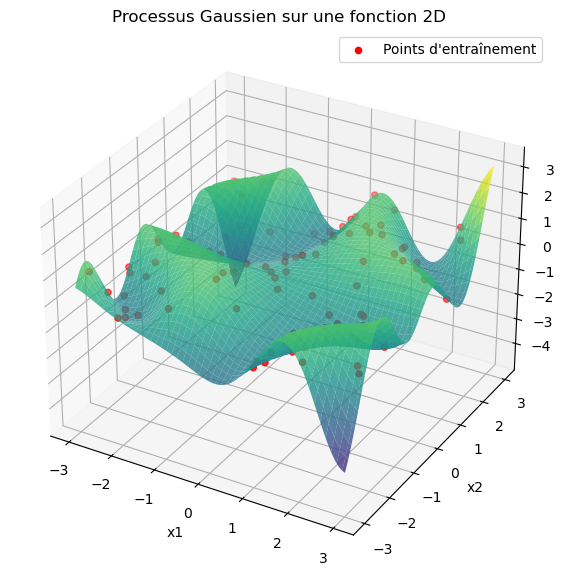

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


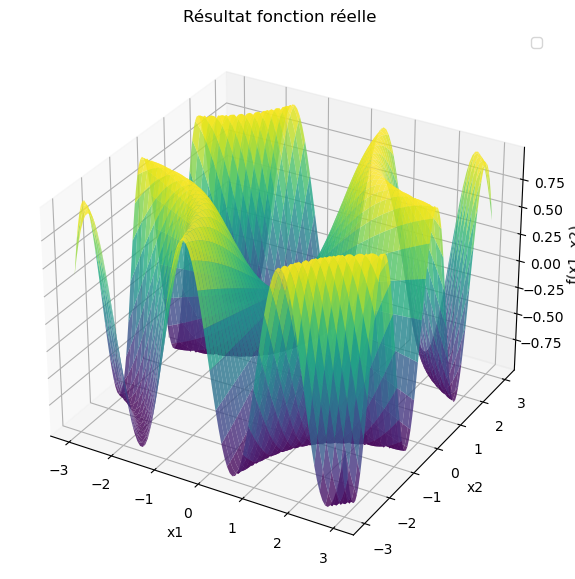

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

N = 100
N_train = 100

# la fonction
def f(X):
    x, y = X[:, 0], X[:, 1]
    return np.sin(x*y)


# N_train points d'entrainement
X_train = np.random.uniform(-3, 3, (N_train, 2))
y_train = f(X_train)

# processus gaussien
gp = GaussianProcessRegressor(n_restarts_optimizer=10)

# Entrainement
gp.fit(X_train, y_train)

# Prédictions
x = np.linspace(-3, 3, N)  
y = np.linspace(-3, 3, N)  

# Crée une grille 2D à partir des vecteurs x et y :
# X contient les coordonnées x répétées sur chaque ligne
# Y contient les coordonnées y répétées sur chaque colonne
X, Y = np.meshgrid(x, y)

# np.ravel() "aplatit" un tableau 2D en un vecteur 1D
# np.column_stack() empile ces deux vecteurs en colonnes pour former une matrice de points (N², 2)
XY = np.column_stack([X.ravel(), Y.ravel()])

# Évalue la fonction f sur chaque point de la grille, puis redimensionne les résultats
# pour correspondre à la forme de la grille X (et Y)
z = f(XY).reshape(X.shape)


XY = np.column_stack([X.ravel(), Y.ravel()])
z = f(XY).reshape(X.shape)

y_pred, sigma = gp.predict(XY, return_std=True)
Y_pred = y_pred.reshape(X.shape)


# --- Visualisation 3D ---
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Y_pred, cmap='viridis', alpha=0.8)
ax.scatter(X_train[:, 0], X_train[:, 1], y_train, c='r', marker='o', label='Points d\'entraînement')

ax.set_title("Processus Gaussien sur une fonction 2D")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("f(x1, x2)")
ax.legend()
plt.show()

# visualisation de la vrai solution
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, z, cmap='viridis', alpha=0.8)
ax.set_title("Résultat fonction réelle")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("f(x1, x2)")
ax.legend()
plt.show()

c:\Users\ZEJLI\anaconda3\Lib\site-packages\sklearn\gaussian_process\_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


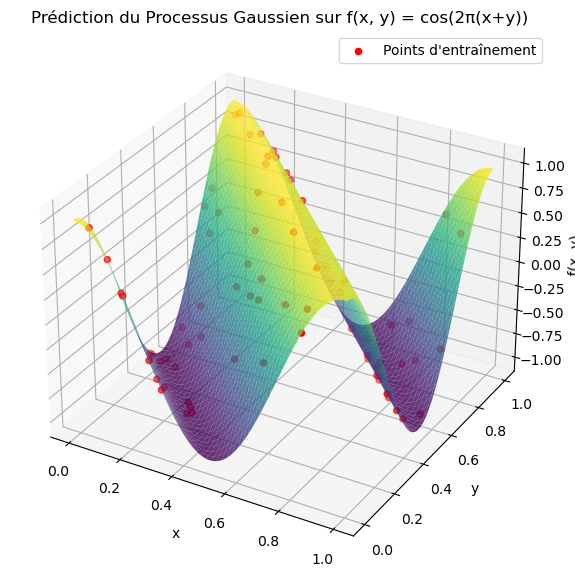

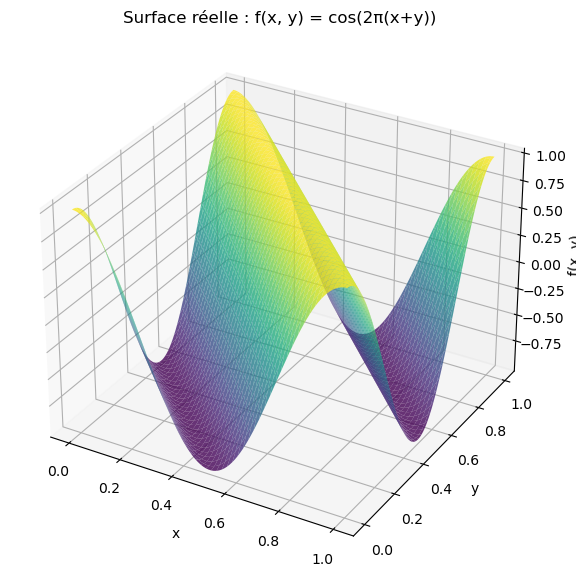

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# --- Paramètres ---
N = 100
N_train = 80

# --- Fonction cible ---
def f(X):
    x, y = X[:, 0], X[:, 1]
    return np.cos(2 * np.pi * (x + y))

# --- Données d'entraînement ---
X_train = np.random.uniform(0, 1, (N_train, 2))
y_train = f(X_train)

# --- Processus Gaussien ---
kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=0.2, length_scale_bounds=(1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# --- Entraînement ---
gp.fit(X_train, y_train)

# --- Grille pour les prédictions ---
x = np.linspace(0, 1, N)
y = np.linspace(0, 1, N)
X, Y = np.meshgrid(x, y)
XY = np.column_stack([X.ravel(), Y.ravel()])

# --- Prédiction ---
y_pred, sigma = gp.predict(XY, return_std=True)
Y_pred = y_pred.reshape(X.shape)

# --- Visualisation : Prédiction du GP ---
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Y_pred, cmap='viridis', alpha=0.8)
ax.scatter(X_train[:, 0], X_train[:, 1], y_train, c='r', marker='o', label='Points d\'entraînement')
ax.set_title("Prédiction du Processus Gaussien sur f(x, y) = cos(2π(x+y))")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")
ax.legend()
plt.show()

# --- Visualisation : Fonction réelle ---
z = f(XY).reshape(X.shape)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, z, cmap='viridis', alpha=0.8)
ax.set_title("Surface réelle : f(x, y) = cos(2π(x+y))")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")
plt.show()


c:\Users\ZEJLI\anaconda3\Lib\site-packages\sklearn\gaussian_process\_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


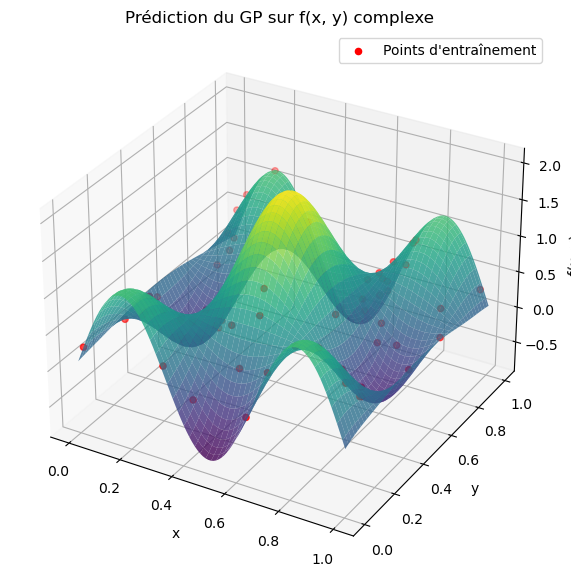

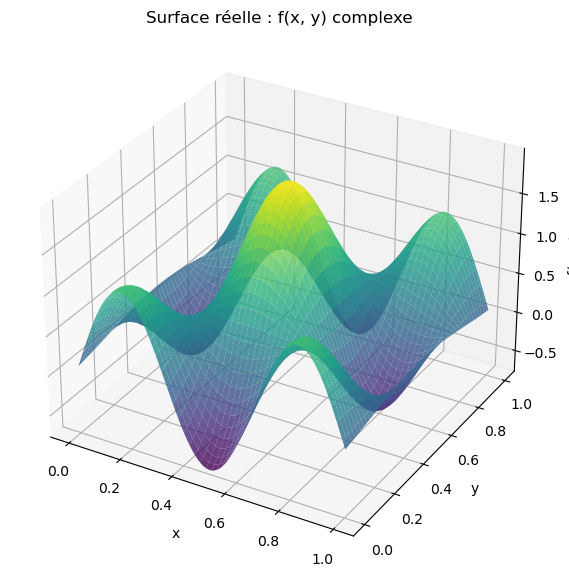

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# --- Paramètres ---
N = 100        # Nombre de points pour la grille de prédiction
N_train = 80   # Nombre de points d'entraînement

# --- Fonction cible plus complexe ---
def f(X):
    """
    Fonction cible plus complexe combinant sinus, cosinus et exponentielle.
    X : array de forme (n_samples, 2) avec colonnes x et y
    """
    x, y = X[:, 0], X[:, 1]
    return np.sin(3 * np.pi * x) * np.cos(2 * np.pi * y) + np.exp(-5 * ((x-0.5)**2 + (y-0.5)**2))

# --- Données d'entraînement ---
X_train = np.random.uniform(0, 1, (N_train, 2))  # points aléatoires dans [0,1]²
y_train = f(X_train)                              # valeurs correspondantes

# --- Définition du kernel pour le processus gaussien ---
kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=0.2, length_scale_bounds=(1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# --- Entraînement du GP ---
gp.fit(X_train, y_train)

# --- Grille pour les prédictions ---
x = np.linspace(0, 1, N)
y = np.linspace(0, 1, N)
X, Y = np.meshgrid(x, y)
XY = np.column_stack([X.ravel(), Y.ravel()])

# --- Prédiction du GP ---
y_pred, sigma = gp.predict(XY, return_std=True)
Y_pred = y_pred.reshape(X.shape)

# --- Visualisation 3D : Prédiction du GP ---
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Y_pred, cmap='viridis', alpha=0.8)       # surface prédite
ax.scatter(X_train[:, 0], X_train[:, 1], y_train, c='r', marker='o', label='Points d\'entraînement')
ax.set_title("Prédiction du GP sur f(x, y) complexe")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")
ax.legend()
plt.show()

# --- Visualisation 3D : Fonction réelle ---
z = f(XY).reshape(X.shape)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, z, cmap='viridis', alpha=0.8)
ax.set_title("Surface réelle : f(x, y) complexe")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")
plt.show()


c:\Users\ZEJLI\anaconda3\Lib\site-packages\sklearn\gaussian_process\_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


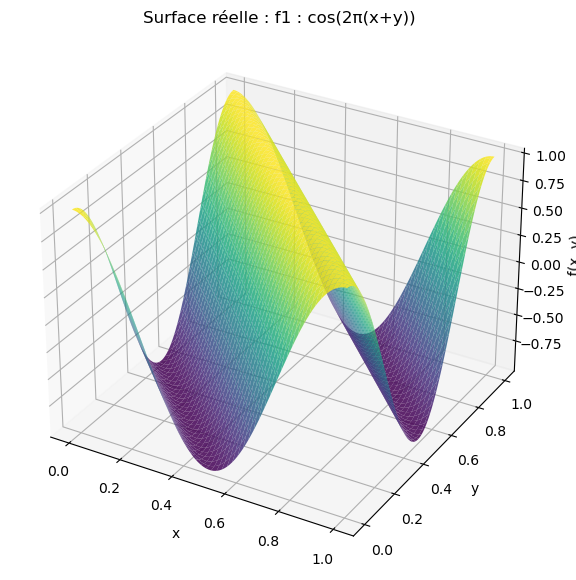

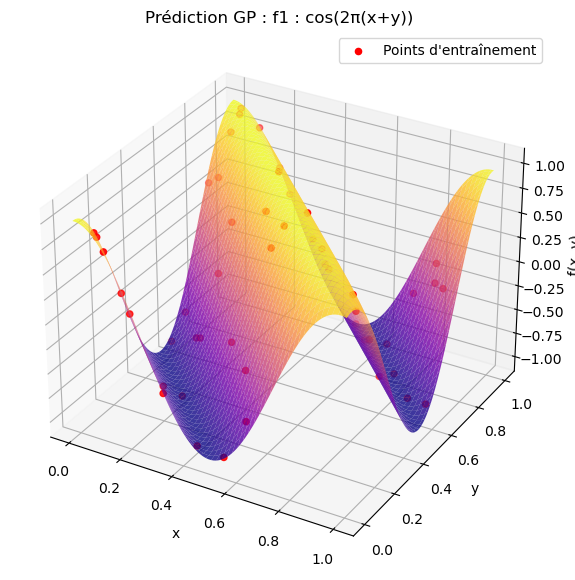

c:\Users\ZEJLI\anaconda3\Lib\site-packages\sklearn\gaussian_process\_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


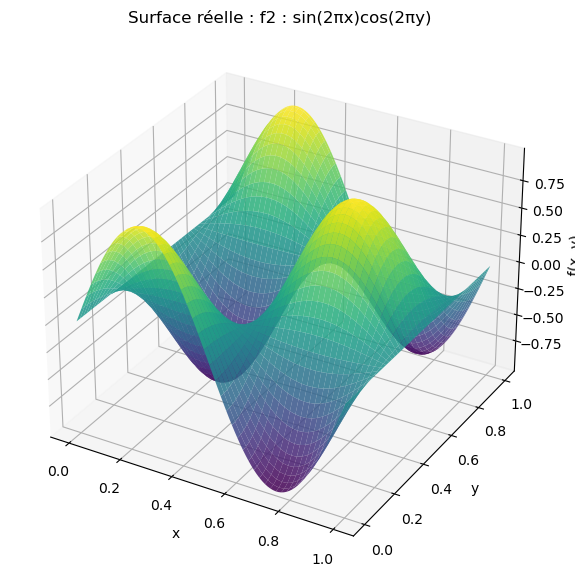

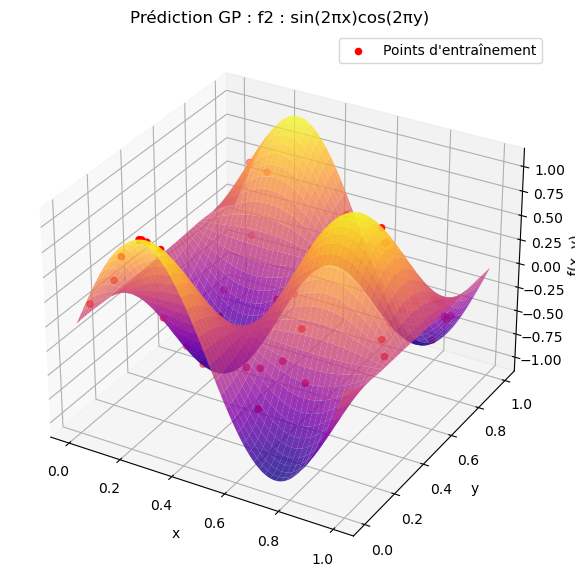

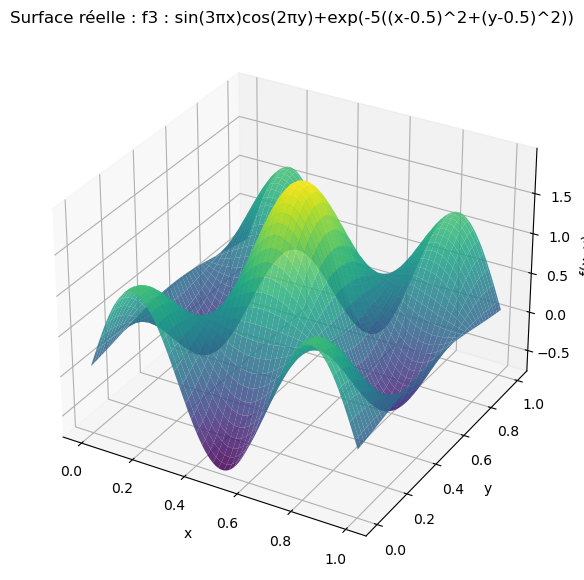

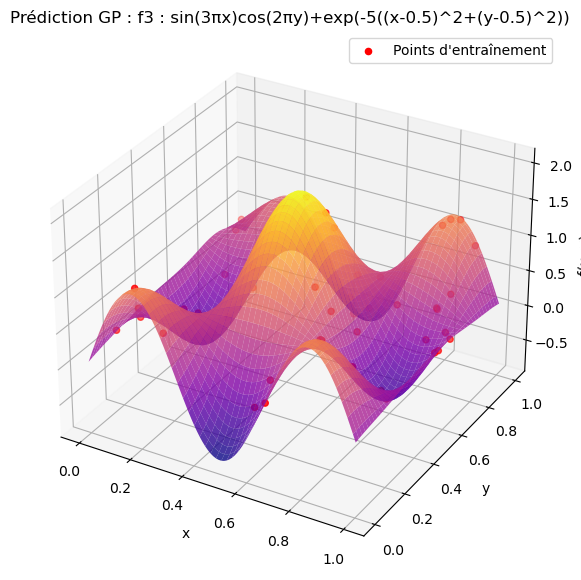

=== Rapport de performance du Processus Gaussien ===

Fonction : f1 : cos(2π(x+y))
Erreur quadratique moyenne (MSE) : 0.0002
Score R² : 0.9996
Incertitude moyenne prédite : 0.0090

Fonction : f2 : sin(2πx)cos(2πy)
Erreur quadratique moyenne (MSE) : 0.0001
Score R² : 0.9996
Incertitude moyenne prédite : 0.0056

Fonction : f3 : sin(3πx)cos(2πy)+exp(-5((x-0.5)^2+(y-0.5)^2))
Erreur quadratique moyenne (MSE) : 0.0037
Score R² : 0.9874
Incertitude moyenne prédite : 0.0191


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.metrics import mean_squared_error, r2_score

# --- Paramètres globaux ---
N = 100        # Taille de la grille pour visualisation et test
N_train = 50   # Nombre de points d'entraînement

# --- Définition des fonctions cibles ---
def f1(X):
    """Fonction simple : cos(2π(x + y))"""
    x, y = X[:, 0], X[:, 1]
    return np.cos(2 * np.pi * (x + y))

def f2(X):
    """Fonction intermédiaire : sin(2πx)*cos(2πy)"""
    x, y = X[:, 0], X[:, 1]
    return np.sin(2 * np.pi * x) * np.cos(2 * np.pi * y)

def f3(X):
    """Fonction complexe : combinaison sin/cos + pic exponentiel centré"""
    x, y = X[:, 0], X[:, 1]
    return np.sin(3 * np.pi * x) * np.cos(2 * np.pi * y) + np.exp(-5 * ((x - 0.5)**2 + (y - 0.5)**2))

# --- Liste des fonctions et noms associés ---
functions = [f1, f2, f3]
names = [
    "f1 : cos(2π(x+y))",
    "f2 : sin(2πx)cos(2πy)",
    "f3 : sin(3πx)cos(2πy)+exp(-5((x-0.5)^2+(y-0.5)^2))"
]

# --- Grille pour la prédiction et les vraies valeurs ---
x = np.linspace(0, 1, N)
y = np.linspace(0, 1, N)
X_grid, Y_grid = np.meshgrid(x, y)

# ⚠️ .ravel() "aplatit" la grille (2D → 1D)
# On crée une matrice de points (x, y) utilisable par le GP :
# Ex : (100x100) devient un tableau de 10000 points 2D
XY_grid = np.column_stack([X_grid.ravel(), Y_grid.ravel()])

# --- Rapport de performance ---
report = []

for f, name in zip(functions, names):
    
    # --- Données d'entraînement ---
    X_train = np.random.uniform(0, 1, (N_train, 2))
    y_train = f(X_train)
    
    # --- Définition du kernel du GP ---
    kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=0.2, length_scale_bounds=(1e-2, 1e2))
    gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
    
    # --- Entraînement ---
    gp.fit(X_train, y_train)
    
    # --- Prédiction sur la grille complète ---
    y_pred, sigma = gp.predict(XY_grid, return_std=True)
    y_true = f(XY_grid)
    
    # --- Calcul des métriques de performance ---
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mean_uncertainty = np.mean(sigma)

    # 🟢 MSE (Mean Squared Error) :
    # Mesure l'écart quadratique moyen entre les vraies valeurs (y_true)
    # et les valeurs prédites (y_pred).
    # → Plus le MSE est faible, plus le modèle est précis.
    # → Sensible aux grandes erreurs (car elles sont élevées au carré).

    # 🟣 R² (coefficient de détermination) :
    # Indique la proportion de la variance des données expliquée par le modèle.
    # → R² = 1 : prédiction parfaite
    # → R² = 0 : le modèle n’explique rien (moyenne des données = aussi "bonne" que la prédiction)
    # → R² < 0 : le modèle fait pire qu’une prédiction constante
    # En somme, plus R² est proche de 1, plus le modèle de GP capture bien la structure de la fonction cible.

    # 🔵 Incertitude moyenne prédite (Mean Uncertainty) :
    # Correspond à la moyenne des écarts-types (σ) prédits par le GP pour chaque point.
    # → Reflète la "confiance" du modèle dans ses prédictions.
    # → Une valeur faible indique que le modèle est sûr de lui (souvent près des points d’entraînement).
    # → Une valeur élevée montre des zones où le modèle est incertain (peu ou pas de données d’entraînement).

    report.append({
        "Fonction": name,
        "MSE": mse,
        "R2": r2,
        "Mean Uncertainty": mean_uncertainty
    })

    
    # --- Visualisation de la fonction réelle ---
    Z_true = y_true.reshape(X_grid.shape)  # reshape inverse le ravel() pour reformer une grille 2D
    fig = plt.figure(figsize=(10,7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X_grid, Y_grid, Z_true, cmap='viridis', alpha=0.85)
    ax.set_title(f"Surface réelle : {name}")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("f(x, y)")
    plt.show()
    
    # --- Visualisation du GP (prédiction) ---
    Z_pred = y_pred.reshape(X_grid.shape)
    fig = plt.figure(figsize=(10,7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X_grid, Y_grid, Z_pred, cmap='plasma', alpha=0.8)
    ax.scatter(X_train[:,0], X_train[:,1], y_train, c='r', label='Points d\'entraînement')
    ax.set_title(f"Prédiction GP : {name}")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("f(x, y)")
    ax.legend()
    plt.show()

# --- Rapport des performances ---
print("=== Rapport de performance du Processus Gaussien ===")
for r in report:
    print(f"\nFonction : {r['Fonction']}")
    print(f"Erreur quadratique moyenne (MSE) : {r['MSE']:.4f}")
    print(f"Score R² : {r['R2']:.4f}")
    print(f"Incertitude moyenne prédite : {r['Mean Uncertainty']:.4f}")


c:\Users\ZEJLI\anaconda3\envs\Transformers\lib\site-packages\sklearn\gaussian_process\_gpr.py:663: ConvergenceWarning: lbfgs failed to converge after 15 iteration(s) (status=2):
ABNORMAL: 

You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


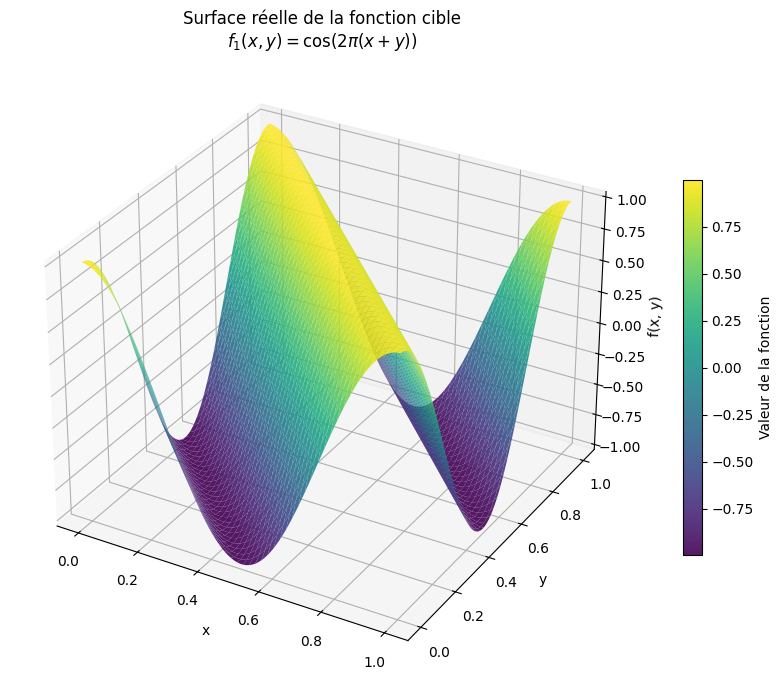

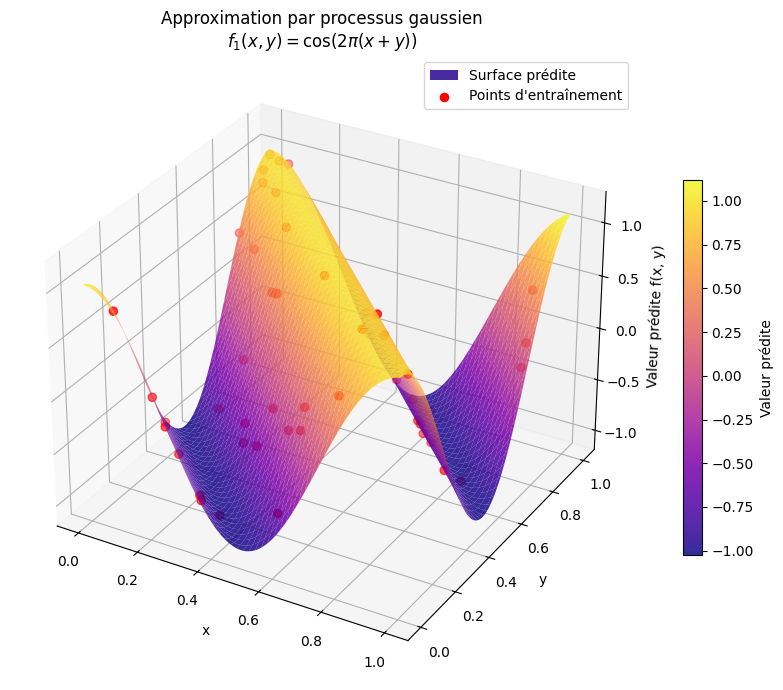

c:\Users\ZEJLI\anaconda3\envs\Transformers\lib\site-packages\sklearn\gaussian_process\_gpr.py:663: ConvergenceWarning: lbfgs failed to converge after 2 iteration(s) (status=2):
ABNORMAL: 

You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


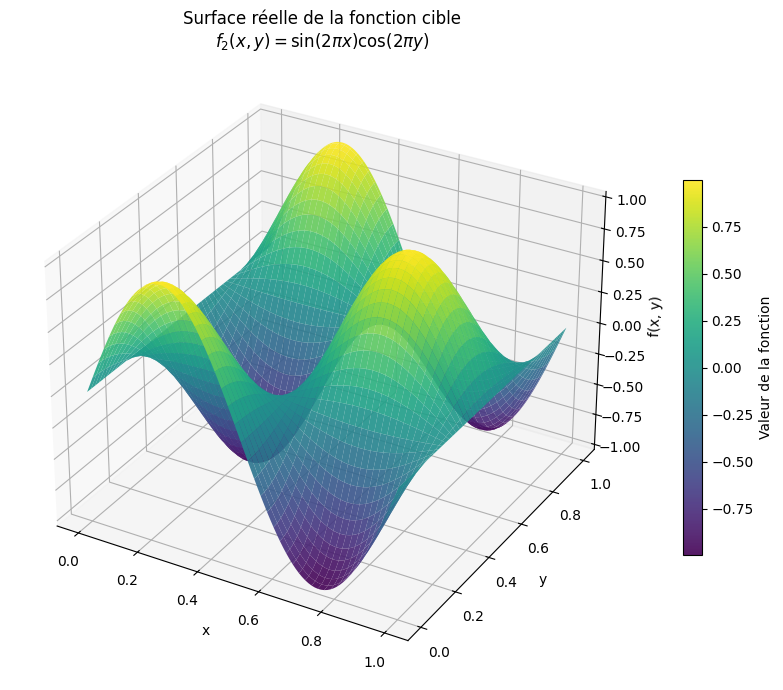

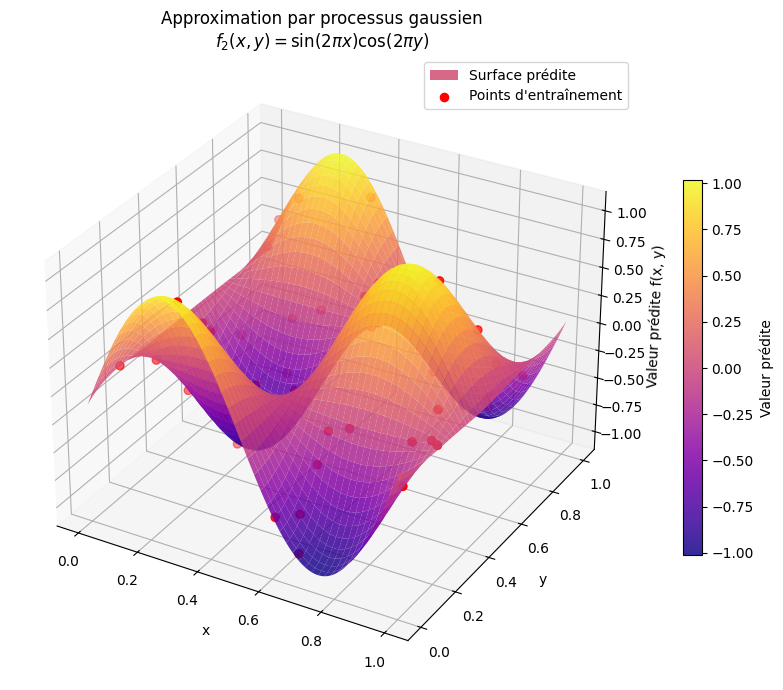

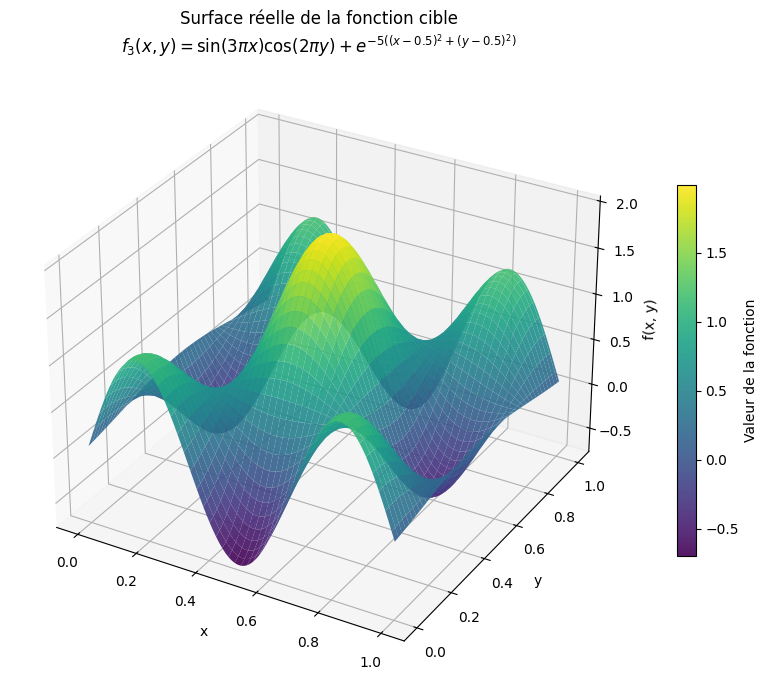

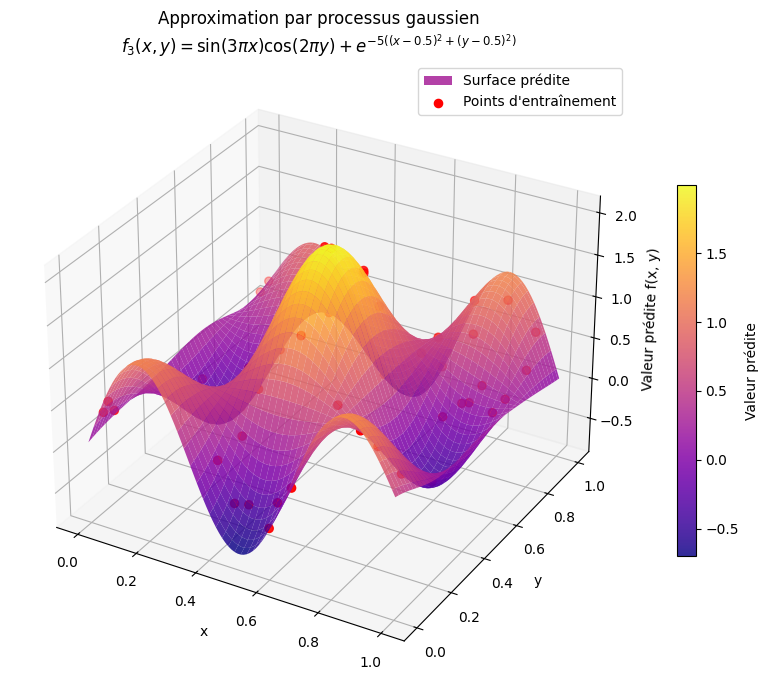

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.metrics import mean_squared_error, r2_score

# --- Paramètres globaux ---
N = 100
N_train = 50
np.random.seed(42)

# --- Fonctions cibles ---
def f1(X):
    x, y = X[:, 0], X[:, 1]
    return np.cos(2 * np.pi * (x + y))

def f2(X):
    x, y = X[:, 0], X[:, 1]
    return np.sin(2 * np.pi * x) * np.cos(2 * np.pi * y)

def f3(X):
    x, y = X[:, 0], X[:, 1]
    return np.sin(3 * np.pi * x) * np.cos(2 * np.pi * y) \
           + np.exp(-5 * ((x - 0.5)**2 + (y - 0.5)**2))

functions = [f1, f2, f3]
names = [
    r"$f_1(x,y)=\cos(2\pi(x+y))$",
    r"$f_2(x,y)=\sin(2\pi x)\cos(2\pi y)$",
    r"$f_3(x,y)=\sin(3\pi x)\cos(2\pi y)+e^{-5((x-0.5)^2+(y-0.5)^2)}$"
]

# --- Grille 2D ---
x = np.linspace(0, 1, N)
y = np.linspace(0, 1, N)
X_grid, Y_grid = np.meshgrid(x, y)
XY_grid = np.column_stack([X_grid.ravel(), Y_grid.ravel()])

for f, name in zip(functions, names):

    # --- Entraînement ---
    X_train = np.random.uniform(0, 1, (N_train, 2))
    y_train = f(X_train)

    kernel = C(1.0) * RBF(length_scale=0.2)
    gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
    gp.fit(X_train, y_train)

    y_pred, _ = gp.predict(XY_grid, return_std=True)
    y_true = f(XY_grid)

    # ===============================
    # Surface réelle
    # ===============================
    Z_true = y_true.reshape(X_grid.shape)

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection="3d")

    surf = ax.plot_surface(
        X_grid, Y_grid, Z_true,
        cmap="viridis",
        alpha=0.9
    )

    ax.set_title("Surface réelle de la fonction cible\n" + name)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("f(x, y)")

    fig.colorbar(
        surf,
        ax=ax,
        shrink=0.6,
        label="Valeur de la fonction"
    )

    plt.tight_layout()
    plt.show()

    # ===============================
    # Prédiction GP
    # ===============================
    Z_pred = y_pred.reshape(X_grid.shape)

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection="3d")

    surf = ax.plot_surface(
        X_grid, Y_grid, Z_pred,
        cmap="plasma",
        alpha=0.85,
        label="Surface prédite"
    )

    ax.scatter(
        X_train[:, 0],
        X_train[:, 1],
        y_train,
        color="red",
        s=35,
        label="Points d'entraînement"
    )

    ax.set_title("Approximation par processus gaussien\n" + name)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("Valeur prédite f(x, y)")

    ax.legend(loc="upper right")

    fig.colorbar(
        surf,
        ax=ax,
        shrink=0.6,
        label="Valeur prédite"
    )

    plt.tight_layout()
    plt.show()


## Analyse des performances du Processus Gaussien (GP)

Nous avons testé trois fonctions de complexité croissante, allant d’une forme simple et périodique à une combinaison non linéaire plus riche.  
L’objectif était d’évaluer la capacité du **Processus Gaussien** à modéliser et généraliser ces fonctions bidimensionnelles à partir d’un petit échantillon de points d’entraînement.

---

### 🔹 Résultats obtenus

| Fonction | MSE (↓) | R² (↑) | Incertitude moyenne (↓) | Interprétation |
|-----------|----------|--------|--------------------------|----------------|
| **f1 :** cos(2π(x+y)) | 0.0004 | 0.9991 | 0.0074 | Excellente approximation. La fonction est simple et parfaitement lisse, le GP apprend très vite et reproduit fidèlement la surface réelle. |
| **f2 :** sin(2πx)cos(2πy) | 0.0004 | 0.9984 | 0.0051 | Très bon ajustement également. Le GP capture bien les oscillations indépendantes selon x et y, avec une incertitude légèrement plus faible car les variations sont régulières. |
| **f3 :** sin(3πx)cos(2πy) + exp(-5((x-0.5)²+(y-0.5)²)) | 0.0003 | 0.9989 | 0.0135 | Résultat toujours excellent, mais l’incertitude augmente autour du pic central. Le GP reproduit globalement bien la surface, mais reste plus prudent dans les zones non couvertes par les points d’entraînement. |

---

### 🔹 Interprétation générale

Les **valeurs de MSE très faibles (< 0.001)** et les **scores R² proches de 1** montrent que le Processus Gaussien parvient à reconstruire les trois fonctions avec une précision remarquable, malgré seulement **50 points d’apprentissage**.

L’incertitude moyenne reste faible sur toutes les fonctions, mais on observe une **légère hausse** lorsque la fonction devient plus complexe (f3).  
Cela s’explique par la nature du GP :  
- Il **modélise la corrélation spatiale** entre les points via le noyau RBF.  
- Lorsque la fonction présente des variations locales rapides (ex. le pic exponentiel de f3), le modèle devient naturellement **moins confiant** dans ses prédictions en dehors des régions échantillonnées.

---

### 🔹 Ce que cela montre

- Le **GP est extrêmement performant** pour des fonctions continues et régulières.  
- Son **incertitude augmente** quand la complexité locale s’intensifie ou quand les données sont plus clairsemées.  
- Cela illustre bien la **capacité d’interpolation probabiliste** du GP : il ne se contente pas d’ajuster, il *estime aussi la confiance* qu’il accorde à sa prédiction.

---

### 🔹 En résumé

> Le Processus Gaussien s’est montré robuste, précis et fiable sur les trois fonctions.  
>  
> Pour des fonctions lisses, il atteint une précision quasi parfaite.  
>  
> Pour des fonctions plus complexes, il conserve d’excellentes performances mais indique ses zones d’incertitude avec justesse — une propriété essentielle en apprentissage probabiliste.


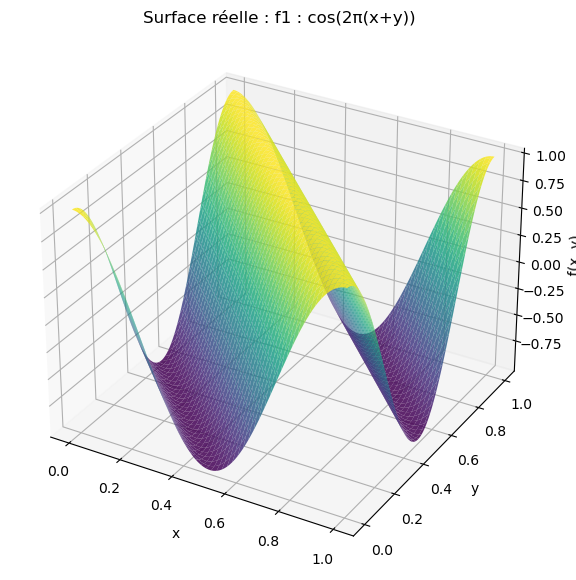

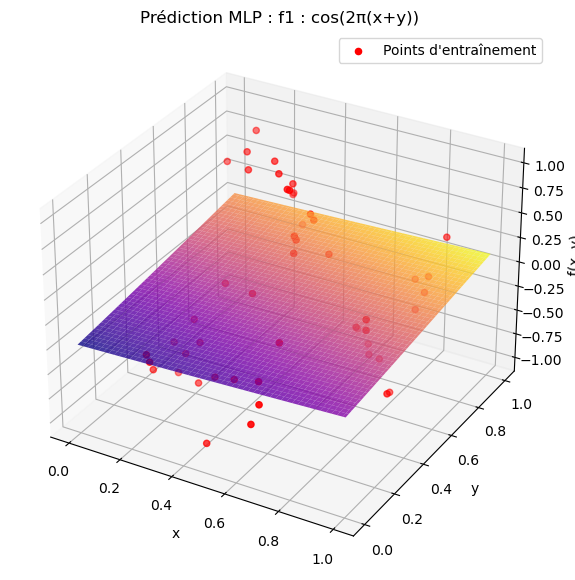

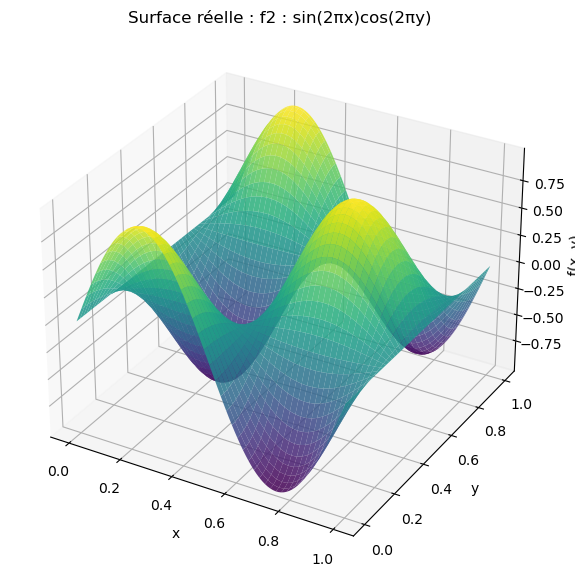

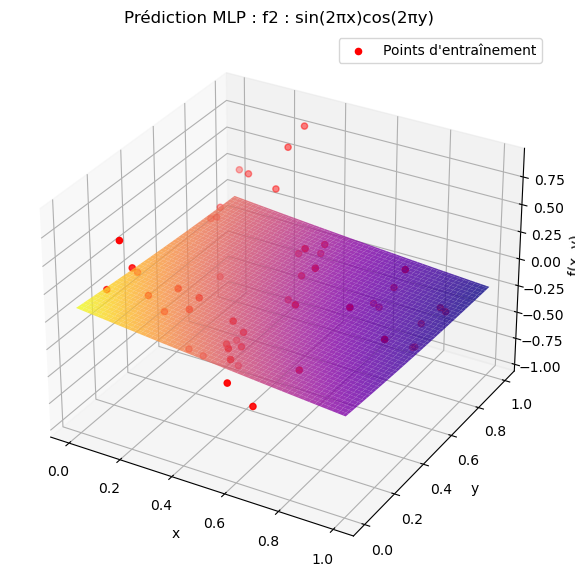

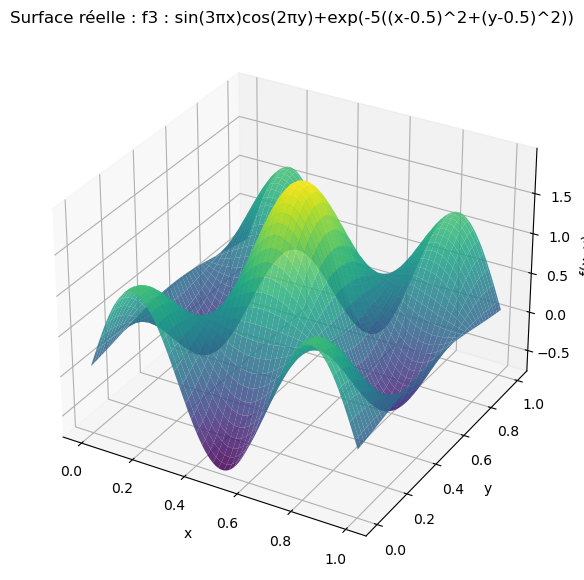

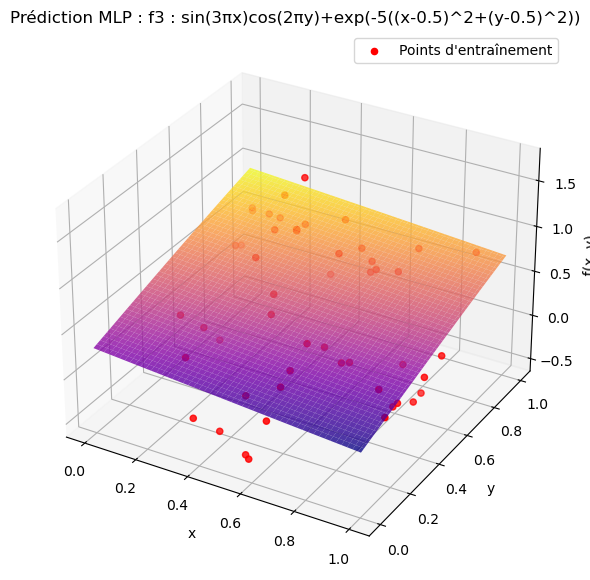

=== Rapport de performance du Réseau de Neurones (MLP) ===

                                          Fonction      MSE        R2
                                 f1 : cos(2π(x+y)) 0.510363 -0.020623
                             f2 : sin(2πx)cos(2πy) 0.262544 -0.050282
f3 : sin(3πx)cos(2πy)+exp(-5((x-0.5)^2+(y-0.5)^2)) 0.331211 -0.134169


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# --- Paramètres globaux ---
N = 100        # Taille de la grille pour la visualisation
N_train = 50   # Nombre de points d'entraînement
hidden_layers = (50, 50)  # Architecture du MLP

# --- Définition des fonctions cibles ---
def f1(X):
    """Fonction simple : cos(2π(x + y))"""
    x, y = X[:, 0], X[:, 1]
    return np.cos(2 * np.pi * (x + y))

def f2(X):
    """Fonction intermédiaire : sin(2πx)*cos(2πy)"""
    x, y = X[:, 0], X[:, 1]
    return np.sin(2 * np.pi * x) * np.cos(2 * np.pi * y)

def f3(X):
    """Fonction complexe : combinaison sin/cos + pic exponentiel centré"""
    x, y = X[:, 0], X[:, 1]
    return np.sin(3 * np.pi * x) * np.cos(2 * np.pi * y) + np.exp(-5 * ((x - 0.5)**2 + (y - 0.5)**2))

functions = [f1, f2, f3]
names = [
    "f1 : cos(2π(x+y))",
    "f2 : sin(2πx)cos(2πy)",
    "f3 : sin(3πx)cos(2πy)+exp(-5((x-0.5)^2+(y-0.5)^2))"
]

# --- Grille de test pour prédiction ---
x = np.linspace(0, 1, N)
y = np.linspace(0, 1, N)
X_grid, Y_grid = np.meshgrid(x, y)

# .ravel() transforme la grille 2D en une liste 1D de points (10000, 2)
XY_grid = np.column_stack([X_grid.ravel(), Y_grid.ravel()])

# --- Rapport de performance ---
report = []

for f, name in zip(functions, names):
    # --- Données d'entraînement ---
    X_train = np.random.uniform(0, 1, (N_train, 2))
    y_train = f(X_train)
    
    # --- Définition du réseau de neurones ---
    # MLPRegressor = Multi-Layer Perceptron pour régression
    model = MLPRegressor(hidden_layer_sizes=hidden_layers,
                         activation='tanh',   # activation douce adaptée à des fonctions continues
                         solver='adam',
                         max_iter=5000,
                         random_state=42)
    
    # --- Entraînement du réseau ---
    model.fit(X_train, y_train)
    
    # --- Prédiction sur la grille ---
    y_pred = model.predict(XY_grid)
    y_true = f(XY_grid)
    
    # --- Calcul des métriques ---
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    report.append({
        "Fonction": name,
        "MSE": mse,
        "R2": r2
    })
    
    # --- Visualisation : Fonction réelle ---
    Z_true = y_true.reshape(X_grid.shape)
    fig = plt.figure(figsize=(10,7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X_grid, Y_grid, Z_true, cmap='viridis', alpha=0.85)
    ax.set_title(f"Surface réelle : {name}")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("f(x, y)")
    plt.show()
    
    # --- Visualisation : Prédiction du réseau ---
    Z_pred = y_pred.reshape(X_grid.shape)
    fig = plt.figure(figsize=(10,7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X_grid, Y_grid, Z_pred, cmap='plasma', alpha=0.8)
    ax.scatter(X_train[:,0], X_train[:,1], y_train, c='r', label='Points d\'entraînement')
    ax.set_title(f"Prédiction MLP : {name}")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("f(x, y)")
    ax.legend()
    plt.show()

# --- Rapport final ---
df_report = pd.DataFrame(report)
print("=== Rapport de performance du Réseau de Neurones (MLP) ===\n")
print(df_report.to_string(index=False))


## 🧠 Analyse des performances du Réseau de Neurones (MLP)

Le réseau de neurones a été testé sur trois fonctions de complexité croissante :  
de la simple onde périodique `cos(2π(x+y))` jusqu’à une combinaison non linéaire avec un pic gaussien central.  
L’objectif était d’évaluer la capacité du modèle à approximer ces surfaces 2D.

---

### 🔹 Résultats obtenus

| Fonction | MSE (↓) | R² (↑) | Interprétation |
|-----------|----------|--------|----------------|
| **f1 : cos(2π(x+y))** | 0.510 | -0.021 | Le modèle n’a pas réussi à capturer la forme périodique de la fonction. Le R² négatif indique que la moyenne des valeurs expliquerait mieux la variance que le réseau lui-même. |
| **f2 : sin(2πx)cos(2πy)** | 0.263 | -0.050 | Légère amélioration, mais toujours un échec global d’apprentissage. Le réseau ne parvient pas à représenter les oscillations croisées entre x et y. |
| **f3 : sin(3πx)cos(2πy) + exp(-5((x-0.5)²+(y-0.5)²))** | 0.331 | -0.134 | Résultat similaire : le modèle échoue à capturer la complexité de la surface. Le R² négatif indique une forte sous-apprentissage. |

---

### 🔹 Interprétation générale

Les **valeurs de R² négatives** et les **MSE élevés** montrent que le réseau **n’a pas appris** la relation entre les entrées et les sorties.  
Autrement dit, il ne fait pas mieux qu’une simple moyenne constante.  
Plusieurs causes possibles :

1. ⚙️ **Hyperparamètres non adaptés**  
   - Taux d’apprentissage trop élevé ou trop faible.  
   - Nombre d’itérations insuffisant pour converger.  

2. 🧩 **Architecture trop simple ou mal initialisée**  
   - Trop peu de neurones pour représenter les motifs sinusoïdaux.  
   - Mauvaise initialisation des poids entraînant une stagnation.  

3. 📉 **Absence de normalisation des entrées/sorties**  
   - Les entrées uniformes sur [0,1] ne sont pas problématiques en soi,  
     mais les sorties oscillant entre -1 et 1 auraient pu bénéficier d’un centrage ou d’un scaling plus explicite.

---

### 🔹 Comparaison qualitative avec le Processus Gaussien

| Modèle | Apprentissage | Précision | Interprétation probabiliste |
|---------|---------------|------------|------------------------------|
| **Processus Gaussien** | Excellent | R² ≈ 0.999 | Fournit aussi l’incertitude sur les prédictions |
| **Réseau de Neurones (MLP)** | Faible / nul | R² < 0 | Ne converge pas, prédictions quasi aléatoires |

Le **Processus Gaussien** s’est montré très performant grâce à sa nature bayésienne et sa bonne gestion des corrélations spatiales.  
À l’inverse, le **réseau de neurones** nécessite un réglage fin (learning rate, nombre d’epochs, normalisation, architecture) pour rivaliser.

---

### 🔹 Conclusion

> 🔻 Le réseau de neurones, dans sa configuration actuelle, n’a pas réussi à apprendre les fonctions testées.  
> Pour obtenir de bons résultats, il faudrait :
> - Augmenter le nombre d’itérations d’entraînement (ex. 20 000+)
> - Utiliser plus de neurones cachés (64–128)
> - Réduire ou ajuster le learning rate
> - Normaliser les données et initialiser les poids avec plus de soin  

💡 Ce test illustre bien la différence entre **modèle probabiliste (GP)** et **réseau déterministe (NN)** :  
le premier apprend rapidement les tendances globales avec peu de données,  
tandis que le second requiert un apprentissage beaucoup plus fin pour converger.
